In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class House_Quality:

  def __init__(self, path):
    self.df = pd.read_csv(path)

  def correlation_matrix(self) -> None:    # Строит стандартную корреляционную матрицу
    plt.subplots(figsize=(10, 8))
    sns.heatmap(self.df.corr(), cmap='RdBu', annot=True, fmt=".2f")
    plt.xticks(range(len(self.df.corr().columns)), self.df.corr().columns);
    plt.yticks(range(len(self.df.corr().columns)), self.df.corr().columns)
    plt.title("Корреляционная матрица", fontsize=16)
    plt.show()

  def correlation_matrix_abs(self) -> None:    # Строит корреляционную матрицу от 0 до 1
    correlation_matrix = self.df.corr()
    correlation_matrix = correlation_matrix.abs()
    plt.subplots(figsize=(10, 8))
    sns.heatmap(correlation_matrix, cmap='Blues', annot=True, fmt=".2f")
    plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns);
    plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
    plt.title("Корреляционная матрица", fontsize=16)
    plt.show()

  def compare_plot(self, column_x: int, column_y: int) -> None:   # Строит график зависимости по 2 параметрам. Ввод по индексу сравниваемых колонок
    plt.figure(figsize=(8, 6))
    title_x = self.df.columns[column_x]
    title_y = self.df.columns[column_y]
    plt.title("{} vs. \n{}".format(title_x, title_y), fontsize=13)
    sns.regplot(x=self.df[title_x], y=self.df[title_y])
    plt.grid(True)
    plt.xlabel(title_x, fontsize=11)
    plt.ylabel(title_y, fontsize=11)
    plt.show()

  def compare_plots_to_parametr(self, column_y: int) -> None:    # Строит графики зависимости по всем параметрам с привязкой к column_y (индекс)
    for i in self.df.columns[:-1]:
      plt.figure(figsize=(8, 6))
      title_y = self.df.columns[column_y]
      plt.title("{} vs. \n{}".format(i, title_y), fontsize=13)
      sns.regplot(x=self.df[i], y=self.df[title_y])
      plt.grid(True)
      plt.xlabel(i, fontsize=11)
      plt.ylabel(title_y, fontsize=11)
      plt.show()

  def top_correlations(self, top_n: int) -> None:        # Выводит top_n корреляционных пар
    correlation_matrix = self.df.corr()
    correlation_pairs = correlation_matrix.unstack()
    correlation_pairs = correlation_pairs.reset_index()
    correlation_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
    correlation_pairs = correlation_pairs[correlation_pairs['Variable 1'] != correlation_pairs['Variable 2']]
    correlation_pairs['Ordered Pair'] = correlation_pairs.apply(lambda x: tuple(sorted([x['Variable 1'], x['Variable 2']])), axis='columns')
    correlation_pairs = correlation_pairs.drop_duplicates(subset=['Ordered Pair'])
    correlation_pairs['Abs Correlation'] = correlation_pairs['Correlation'].abs()
    top_correlations = correlation_pairs.sort_values(by='Abs Correlation', ascending=False)
    for i in range(top_n):
      row = top_correlations.iloc[i]
      print(f"{i + 1}. {row['Variable 1']} AND {row['Variable 2']}: {row['Correlation']:.2f}")

  def top_correlations_to_parametr(self, top_n: int, num_column: int) -> None:  # Выводит top_n корреляционных пар с привязкой к to_column
    correlation_matrix = self.df.corr()
    to_column = self.df.columns[num_column]
    correlation_pairs = correlation_matrix[[to_column]].reset_index()
    correlation_pairs.columns = ['Variable', 'Correlation']
    correlation_pairs = correlation_pairs[correlation_pairs['Variable'] != to_column]
    correlation_pairs['Abs Correlation'] = correlation_pairs['Correlation'].abs()
    top_correlations = correlation_pairs.sort_values(by='Abs Correlation', ascending=False)
    for i in range(min(top_n, len(top_correlations))):
        row = top_correlations.iloc[i]
        print(f"{i + 1}. {row['Variable']} AND {to_column}: {row['Correlation']:.2f}")


In [2]:
boston = House_Quality("/content/drive/MyDrive/BostonHousing.csv")

In [3]:
boston.df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
boston.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
boston.df = boston.df.rename(columns={'crim': 'Преступлений на душу','zn': '% крупных участков (>23.000ft)'})
boston.df.head()

,Преступлений на душу,% крупных участков (>23.000ft),indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
boston.df.columns = [
    'Преступлений на душу [0]', '% крупных участков (>23.000ft) [1]', '% нежилого фонда [2]',
    'У реки Чарльз? [3]', 'Загрязненность воздуха [4]', 'Ср.кол-во комнат на дом [5]',
    '% домов до 1940 [6]', 'Ср.расстояние до центров [7]', 'Индекс доступности дорог [8]',
    'Налог долл на 10.000 долл стоимости жилья [9]', 'Учеников на 1 учителя [10]', 'Афро-американцы на 1000 чел [11]',
    '% малоимущего населения [12]', 'Медианная стоимость жилья в тыс.долл [13]'
    ]
boston.df.head()

,Преступлений на душу [0],% крупных участков (>23.000ft) [1],% нежилого фонда [2],У реки Чарльз? [3],Загрязненность воздуха [4],Ср.кол-во комнат на дом [5],% домов до 1940 [6],Ср.расстояние до центров [7],Индекс доступности дорог [8],Налог долл на 10.000 долл стоимости жилья [9],Учеников на 1 учителя [10],Афро-американцы на 1000 чел [11],% малоимущего населения [12],Медианная стоимость жилья в тыс.долл [13]
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


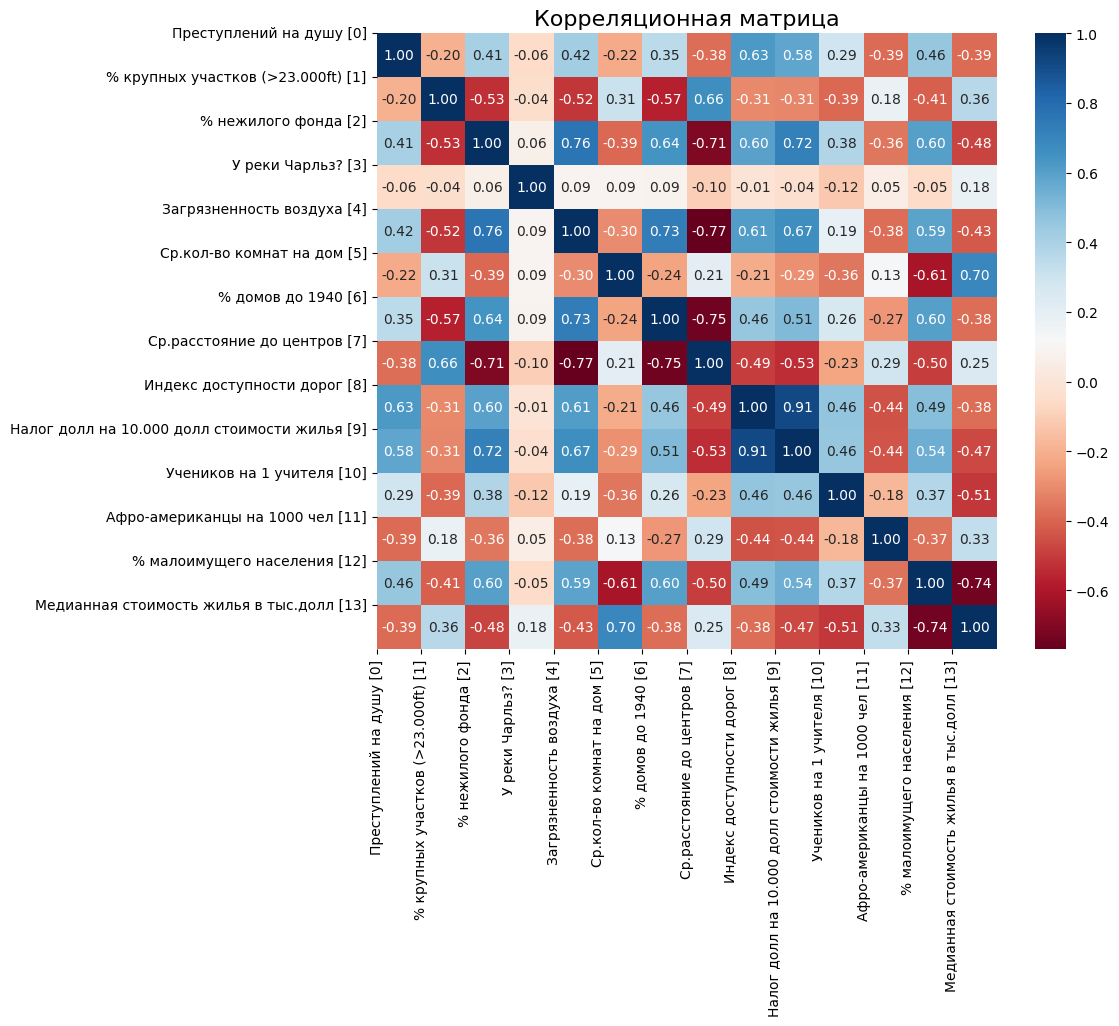

In [7]:
boston.correlation_matrix()

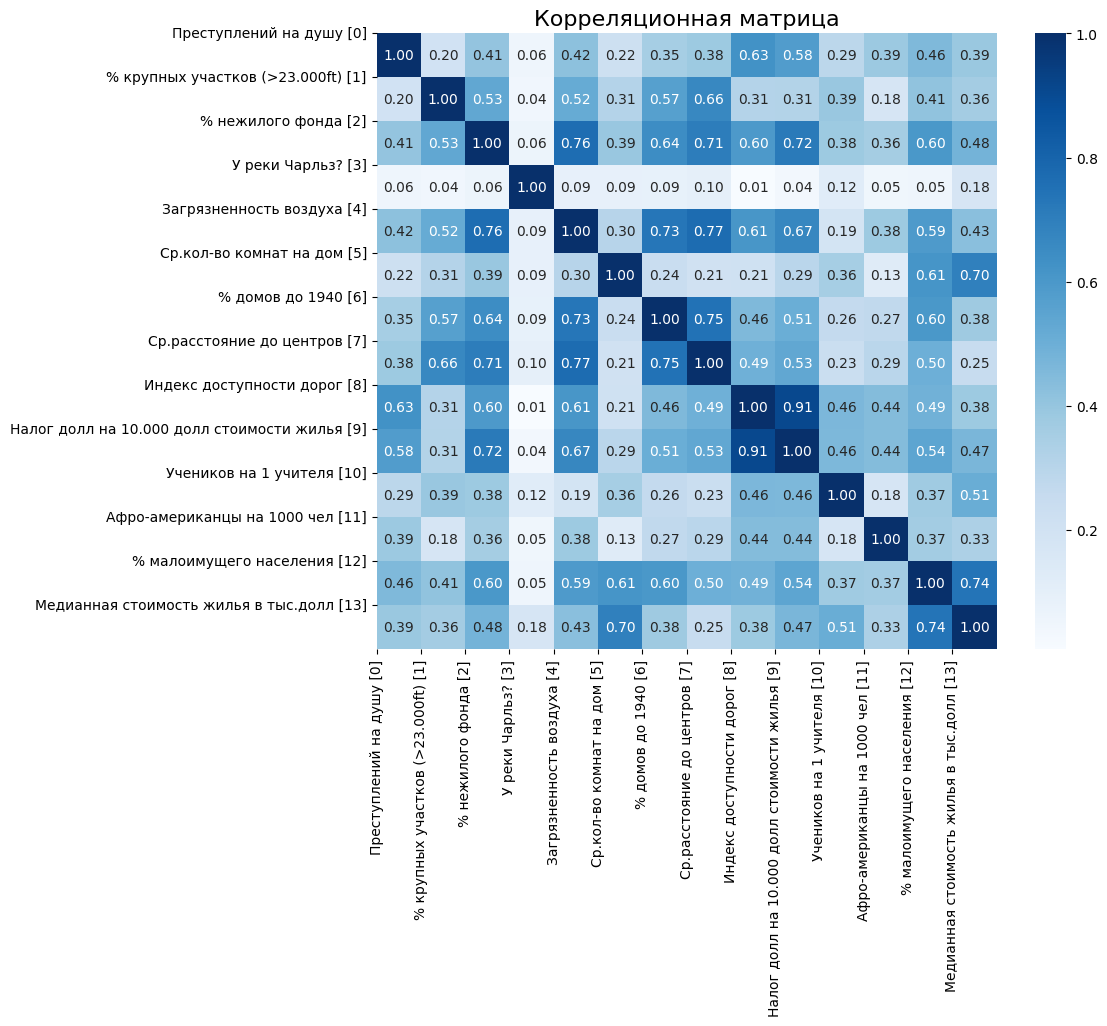

In [8]:
boston.correlation_matrix_abs()

In [9]:
boston.top_correlations(20)

1. Индекс доступности дорог [8] AND Налог долл на 10.000 долл стоимости жилья [9]: 0.91
2. Загрязненность воздуха [4] AND Ср.расстояние до центров [7]: -0.77
3. % нежилого фонда [2] AND Загрязненность воздуха [4]: 0.76
4. % домов до 1940 [6] AND Ср.расстояние до центров [7]: -0.75
5. % малоимущего населения [12] AND Медианная стоимость жилья в тыс.долл [13]: -0.74
6. Загрязненность воздуха [4] AND % домов до 1940 [6]: 0.73
7. % нежилого фонда [2] AND Налог долл на 10.000 долл стоимости жилья [9]: 0.72
8. % нежилого фонда [2] AND Ср.расстояние до центров [7]: -0.71
9. Ср.кол-во комнат на дом [5] AND Медианная стоимость жилья в тыс.долл [13]: 0.70
10. Загрязненность воздуха [4] AND Налог долл на 10.000 долл стоимости жилья [9]: 0.67
11. % крупных участков (>23.000ft) [1] AND Ср.расстояние до центров [7]: 0.66
12. % нежилого фонда [2] AND % домов до 1940 [6]: 0.64
13. Преступлений на душу [0] AND Индекс доступности дорог [8]: 0.63
14. Ср.кол-во комнат на дом [5] AND % малоимущего населени

In [16]:
boston.top_correlations_to_parametr(20, 13)

1. % малоимущего населения [12] AND Медианная стоимость жилья в тыс.долл [13]: -0.74
2. Ср.кол-во комнат на дом [5] AND Медианная стоимость жилья в тыс.долл [13]: 0.70
3. Учеников на 1 учителя [10] AND Медианная стоимость жилья в тыс.долл [13]: -0.51
4. % нежилого фонда [2] AND Медианная стоимость жилья в тыс.долл [13]: -0.48
5. Налог долл на 10.000 долл стоимости жилья [9] AND Медианная стоимость жилья в тыс.долл [13]: -0.47
6. Загрязненность воздуха [4] AND Медианная стоимость жилья в тыс.долл [13]: -0.43
7. Преступлений на душу [0] AND Медианная стоимость жилья в тыс.долл [13]: -0.39
8. Индекс доступности дорог [8] AND Медианная стоимость жилья в тыс.долл [13]: -0.38
9. % домов до 1940 [6] AND Медианная стоимость жилья в тыс.долл [13]: -0.38
10. % крупных участков (>23.000ft) [1] AND Медианная стоимость жилья в тыс.долл [13]: 0.36
11. Афро-американцы на 1000 чел [11] AND Медианная стоимость жилья в тыс.долл [13]: 0.33
12. Ср.расстояние до центров [7] AND Медианная стоимость жилья в 

In [22]:
boston.top_correlations_to_parametr(20, 7)

1. Загрязненность воздуха [4] AND Ср.расстояние до центров [7]: -0.77
2. % домов до 1940 [6] AND Ср.расстояние до центров [7]: -0.75
3. % нежилого фонда [2] AND Ср.расстояние до центров [7]: -0.71
4. % крупных участков (>23.000ft) [1] AND Ср.расстояние до центров [7]: 0.66
5. Налог долл на 10.000 долл стоимости жилья [9] AND Ср.расстояние до центров [7]: -0.53
6. % малоимущего населения [12] AND Ср.расстояние до центров [7]: -0.50
7. Индекс доступности дорог [8] AND Ср.расстояние до центров [7]: -0.49
8. Преступлений на душу [0] AND Ср.расстояние до центров [7]: -0.38
9. Афро-американцы на 1000 чел [11] AND Ср.расстояние до центров [7]: 0.29
10. Медианная стоимость жилья в тыс.долл [13] AND Ср.расстояние до центров [7]: 0.25
11. Учеников на 1 учителя [10] AND Ср.расстояние до центров [7]: -0.23
12. Ср.кол-во комнат на дом [5] AND Ср.расстояние до центров [7]: 0.21
13. У реки Чарльз? [3] AND Ср.расстояние до центров [7]: -0.10


In [13]:
# Если бы в названиях колонок не были указаны индексы, информация для построения графиков:

# pd.DataFrame({'Индексы колонок для графика': boston.df.columns})

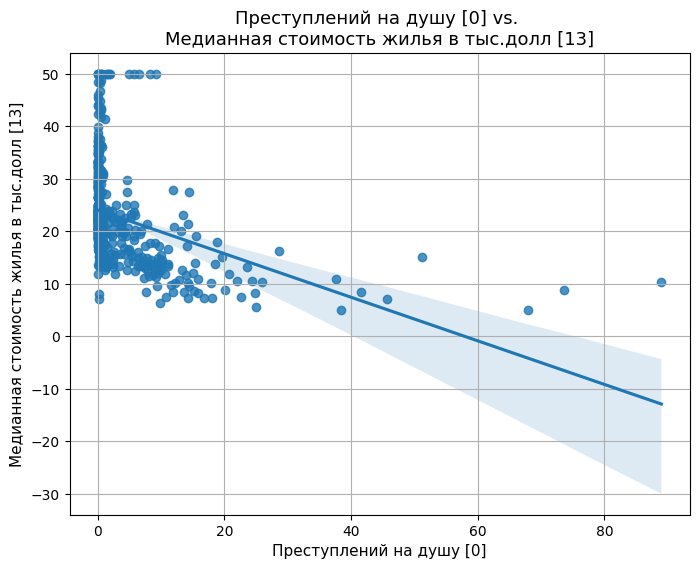

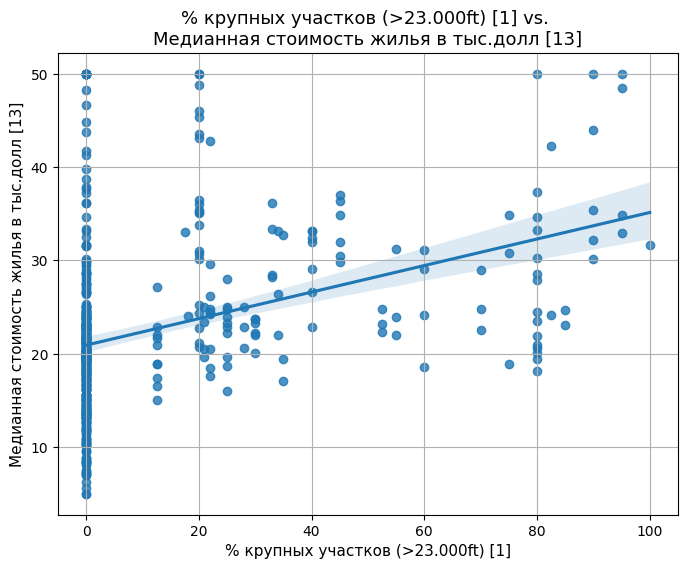

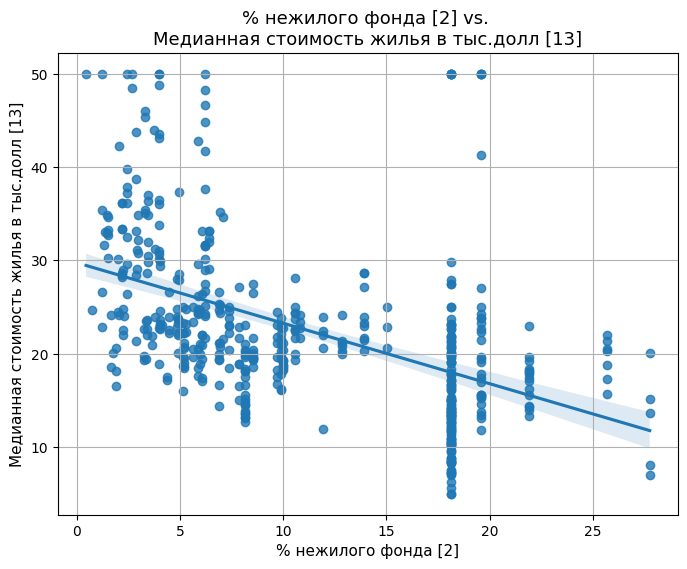

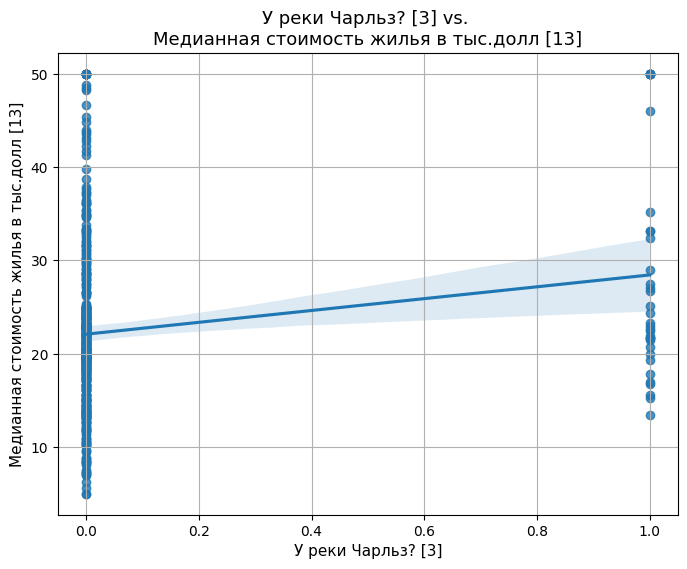

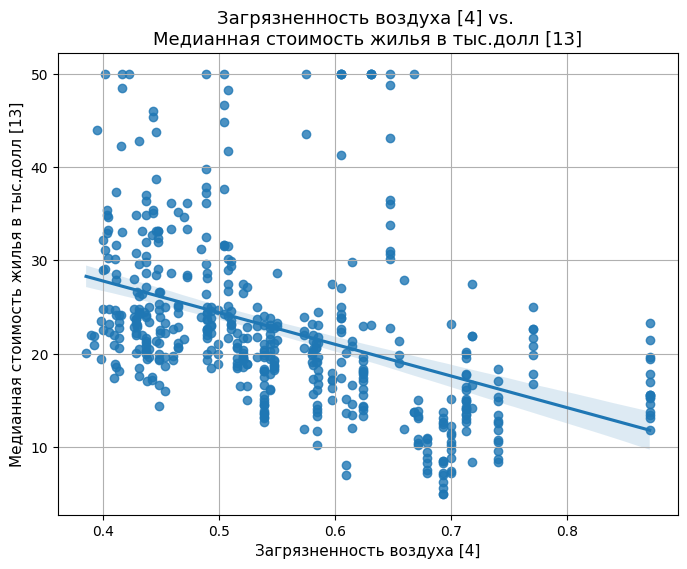

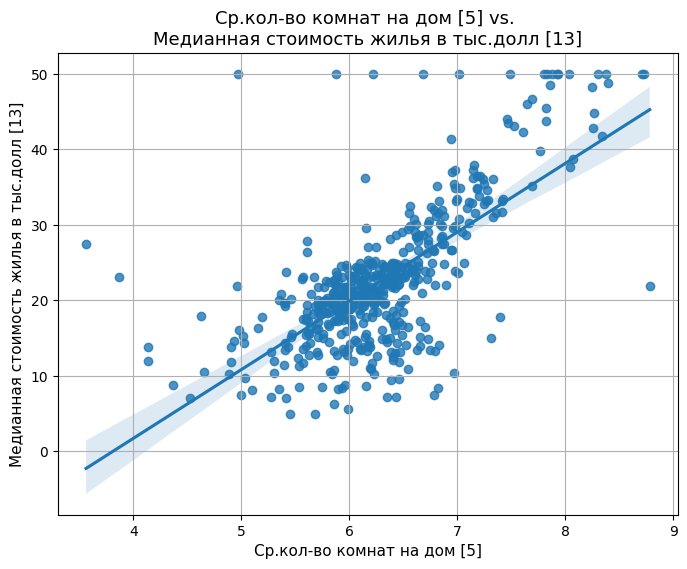

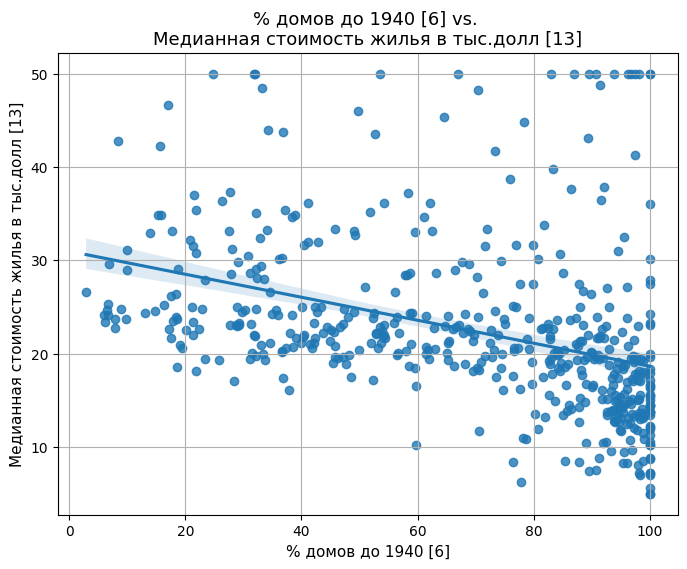

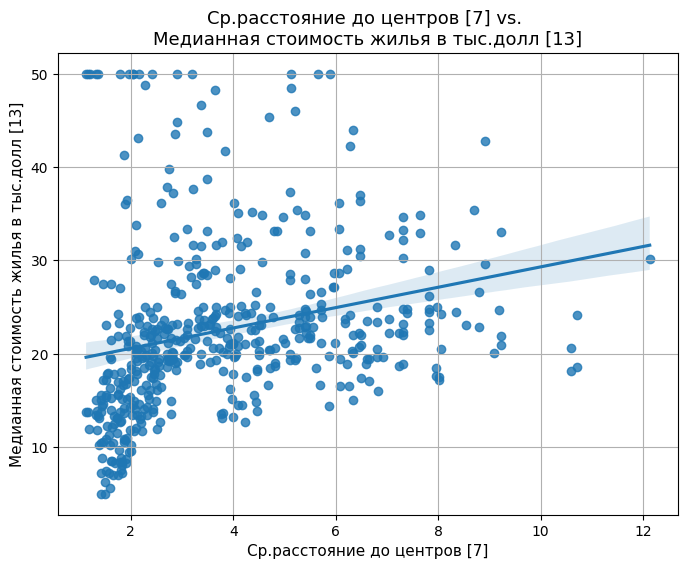

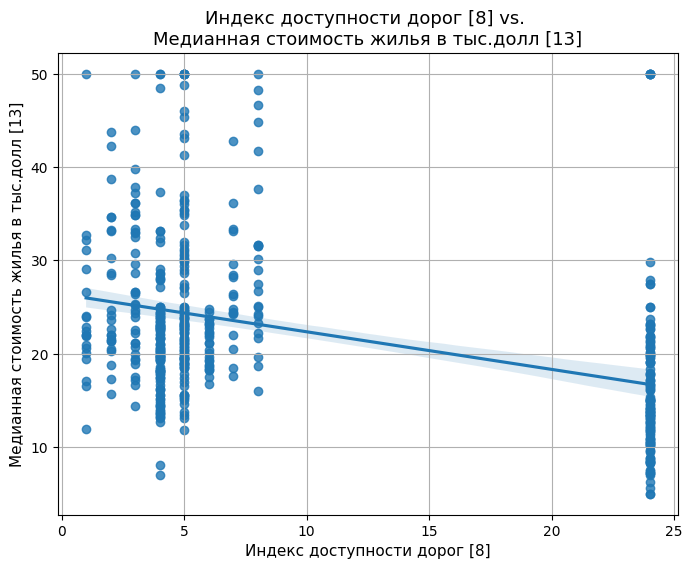

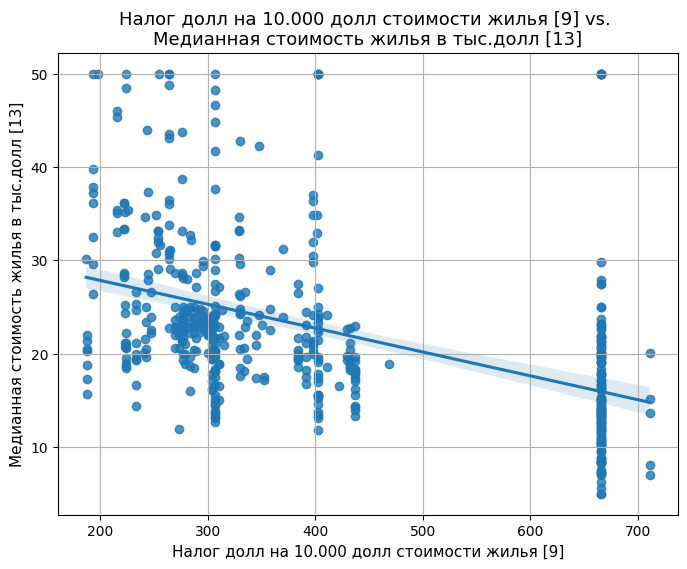

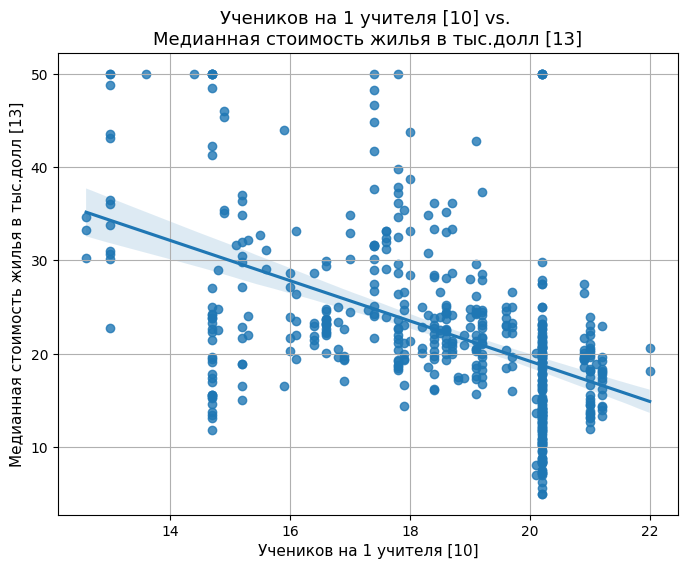

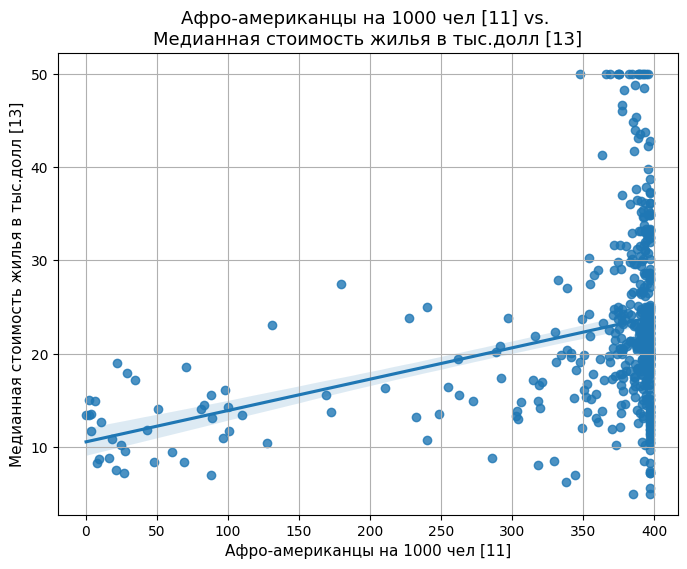

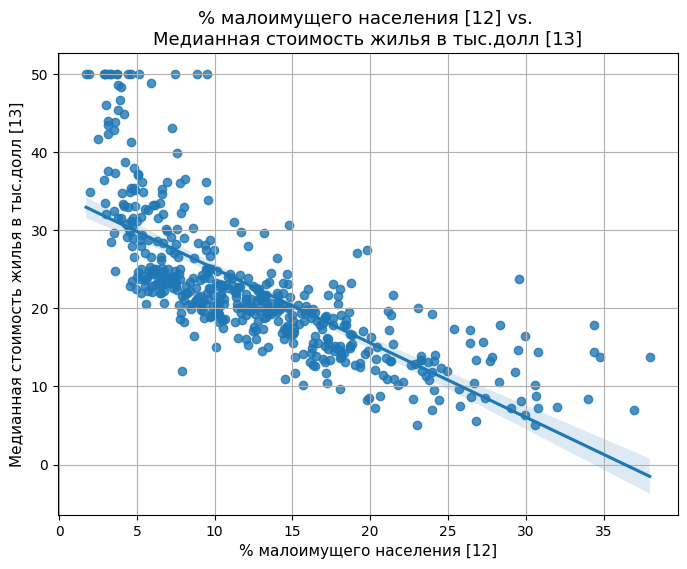

In [14]:
boston.compare_plots_to_parametr(13)

Выводы:

1. Сильнее всего стоимость жилья зависит от % малоимущего населения. Бедные люди чаще всего строят дешевые одноэтажные дома, либо размещают на участке "дома на колёса", чтобы сэкономить. Поэтому медиана стоимости жилья падает с ростом малоимущего населения.
2. Ср.кол-во комнат на дом AND Медианная стоимость жилья в тыс.долл коррелируют из логики "меньше площадь - меньше стоимость".
3. Существует средняя зависимость стоимости жилья от обеспечения поселения учителями. Однако, следует понимать, что есть фактор благополучного района, где учителей может быть такое же количество, как в бедном, но более состоятельное население в принципе заводит меньше детей. От этого данная корреляция не может быть первичной без параметра "ср.кол-во детей на семью"
4. Пара % нежилого фонда AND Медианная стоимость жилья в тыс.долл может быть связана с парой Загрязненность воздуха AND Медианная стоимость жилья в тыс.долл поскольку большее количество нежилой площади может свидетельствовать о большем присутствии предприятий, ухудшающих качество воздуха. Однако, в нежилой фонд могут также попадать офисные здания, которые не оставляют такой же углеродный след и поэтому обе корреляции следует считать как средние.
5. Налог долл на 10.000 долл стоимости жилья AND Медианная стоимость жилья в тыс.долл средне влияют друг на друга, поскольку с одной стороны логичен тезис "меньше стоимость жилья - меньше налог", однако зависимость не учитывает факторы налоговых льгот и прочих вычетов (напр. за экологию), о которых мы можем догадываться лишь из косвенных параметров. Плюс странный налог в 666 долл. у 26% поселений, может быть выброс, но для такого вывода нужно серьезное погружение в налоги Бостона.
6. В случае Преступлений на душу AND Медианная стоимость жилья в тыс.долл я бы предложил назвать корреляцию сильной, поскольку из графика наглядно видно, что если коэффициент составляет ~ >1,2, то вероятность медианной стоимости жилья, превышающей 30 тыс. долл. (5% от всех) резко падает и стремиться к 0, тогда как ~ <1,2 может давать медианы 30-50 тыс.долл (22% от всех) ощутимо чаще. Также для чистоты сравнения можно было бы убрать все медианы 50 тыс.долларов т.к. они являются потолком отчёта и фактические медианы в этих поселениях могут быть по факту выше, но это уже глубокие дебри анализа ещё на 10 часов:)
7. По всей видимости в индексе доступности дорог наблюдается выброс на значении 24. Надо его тоже чистить, но см.пункт выше:)
8. Средне-слабая зависимость % домов до 1940 AND Медианная стоимость жилья в тыс.долл, поскольку очень большой разброс данных. Корреляция есть, что чем выше % домов старше 1940 года, тем ниже их медианная стоимость, но как основополагающий фактор считать не стоит, есть более значимые параметры.
9. % крупных участков (>23.000ft) AND Медианная стоимость жилья в тыс.долл аналогично предыдущему, прямая связь есть, но характер средне-слабый.
10. Афро-американцы на 1000 чел сам по себе спорный по методике вычисления параметр, поэтому лучше его избегать, по крайней мере в этом виде. Хотя бы был не Bk^2, а просто Bk и уже хорошо.
11. Ср.расстояние до центров AND Медианная стоимость жилья в тыс.долл очень сильно коррелирует до отметки в 3км, однако дальше начинается сильный разброс. Лучший вывод - более бедные районы находятся ближе к центру. Вызвано тем, что в этих районах 1) Загазован воздух, 2) Много предприятий, 3) Старая инфраструктура (много домов до 1940 года).
12. У реки Чарльз? AND Медианная стоимость жилья в тыс.долл коррелируют слабо. Возможно, экология реки оставляет вопросы. Возможно, для местных жителей эта река не обладает сокральным эстетическим значением. А может всё вместе:)

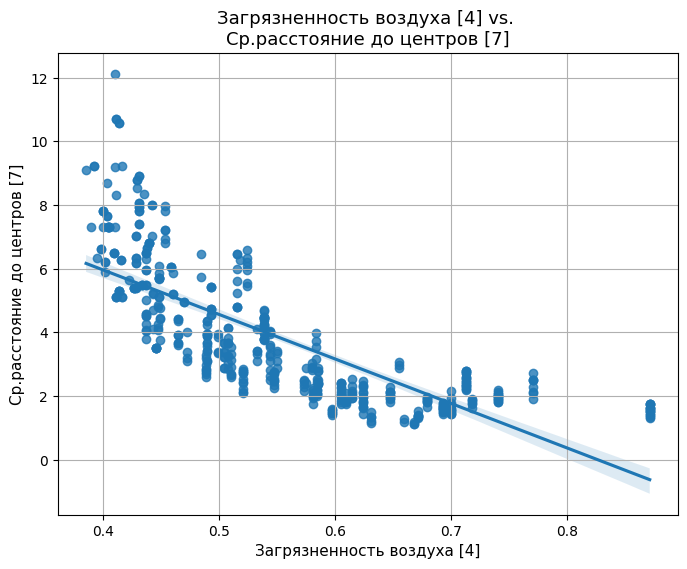

In [24]:
boston.compare_plot(4, 7)

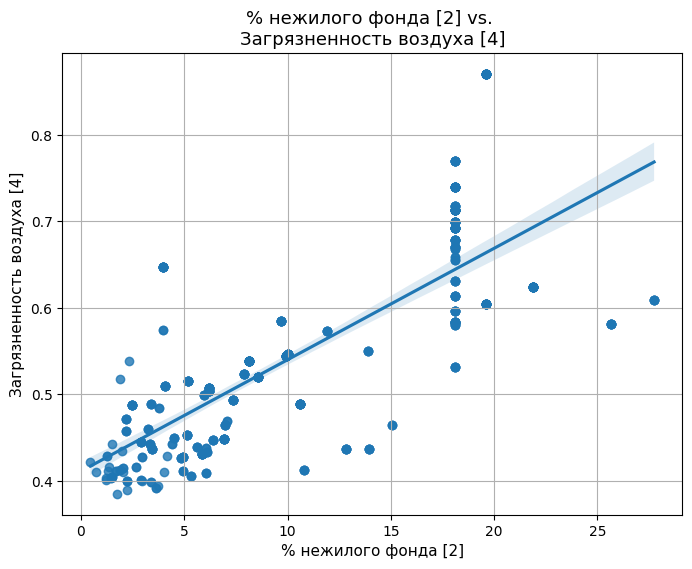

In [25]:
boston.compare_plot(2, 4)

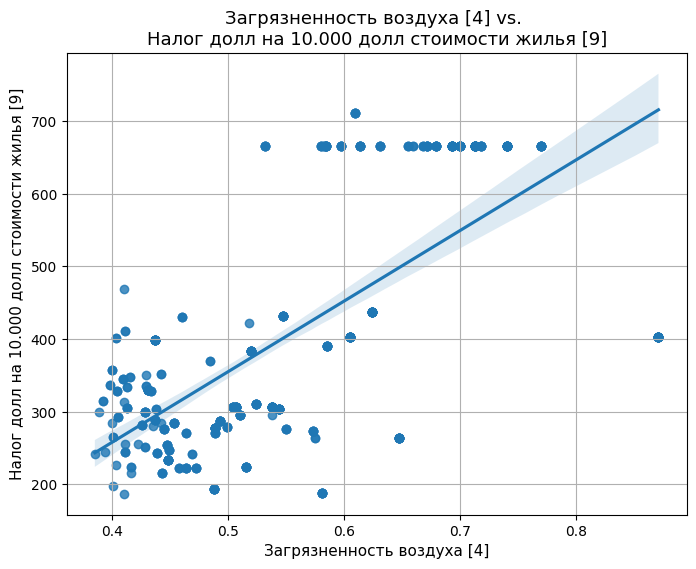

In [27]:
boston.compare_plot(4, 9)

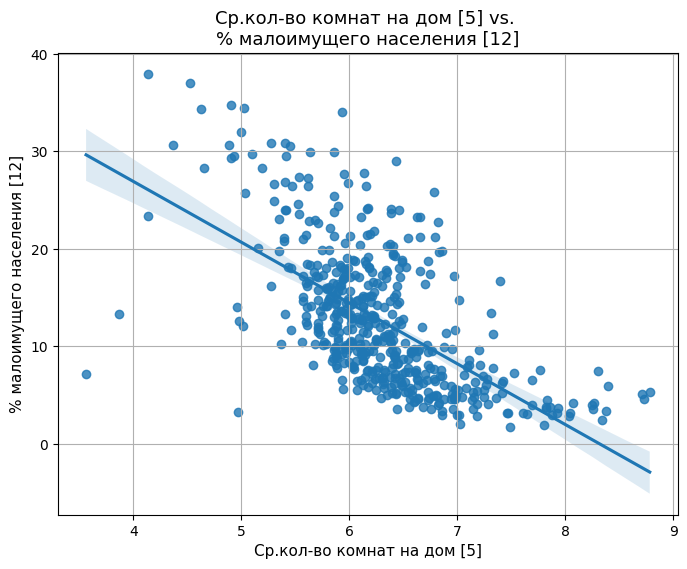

In [29]:
boston.compare_plot(5, 12)

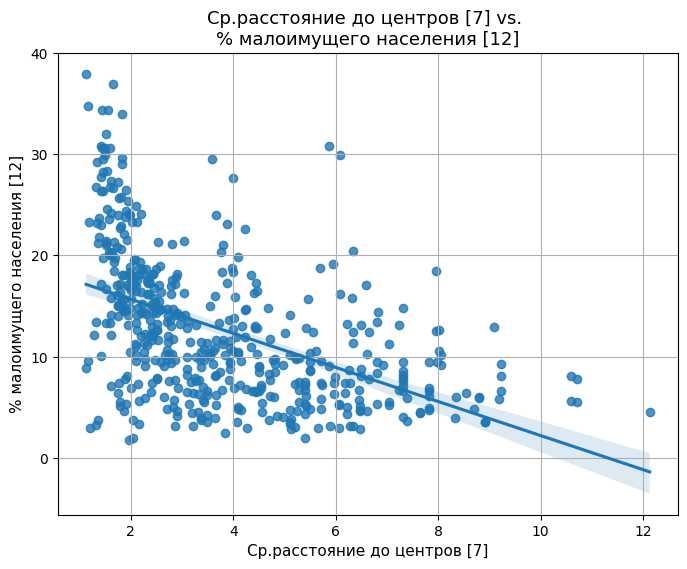

In [30]:
boston.compare_plot(7, 12)

Дополнительные выводы:
1. Чем ближе к центру, тем грязнее воздух (удивительно:))
2. Чем больше нежилых зданий, тем грязнее воздух (удивительно(2):)) А ещё там выброс, но он несущественно влияет на итог.
3. Чем грязнее воздух - тем выше налоги -_-, скорее всего потенциальный выброс на 666 долл. сбил статистику. Без него, визуально корреляция слабая.
4. Чем меньше % малоимущих - тем в среднем больше комнат в домах (удивительно(3):).
5. % малоимущих сильно коррелируют с расстоянием до 2-3 км центров. В то же время, более обеспеченных поселений на этом расстоянии мало.
